# MI6
### MI BCCN 2022


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras import initializers

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

x_train,x_test= x_train/255,x_test/255
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)
x_train_f = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test_f = x_test.reshape(x_test.shape[0], 784).astype('float32')
initializer = tf.keras.initializers.Zeros()


11490434/11490434 [==============================] - 2s 0us/step


# Linear model

In [12]:
initializer = tf.keras.initializers.Zeros()
single_neuron = keras.layers.Dense(units = 10, input_dim= 784, activation = 'softmax', kernel_initializer = initializer, bias_initializer= initializer)
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.SGD(learning_rate = 0.5)

linear_neuron_model = keras.models.Sequential()
linear_neuron_model.add(single_neuron)
linear_neuron_model.compile(loss =loss, optimizer = optimizer,metrics = 'accuracy')
linear_neuron_model.summary()


history_linear = linear_neuron_model.fit(x_train_f,y_train,batch_size=100,epochs= 17, validation_data = (x_test_f, y_test),  validation_freq = 1) 


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/17
600/600 [==============================] - 2s 3ms/step - loss: 0.3906 - accuracy: 0.8878 - val_loss: 0.2961 - val_accuracy: 0.9147
Epoch 2/17
600/600 [==============================] - 1s 2ms/step - loss: 0.3063 - accuracy: 0.9133 - val_loss: 0.2863 - val_accuracy: 0.9206
Epoch 3/17
600/600 [==============================] - 1s 2ms/step - loss: 0.2915 - accuracy: 0.9177 - val_loss: 0.2779 - val_accuracy: 0.9215
Epoch 4/17
600/600 [==============================] - 2s 3ms/step - loss: 0.2839 - accuracy: 0.9210 - val_loss: 0.2795 - val_accuracy: 0.9207
Epoch 5/17
6

# MLP

In [4]:
input_layer = keras.layers.Dense(
    units = 1500,input_dim = 784, activation =  'relu', 
    kernel_initializer=initializers.TruncatedNormal(mean = 0,stddev=0.01), 
    bias_initializer=initializers.Constant(value=0.1)

)
hidden_layer_1 = keras.layers.Dense(
    units = 1500, input_dim =  1500, activation =  'relu', 
    kernel_initializer=initializers.TruncatedNormal(mean = 0,stddev=0.01), 
    bias_initializer=initializers.Constant(value=0.1)

)
hidden_layer_2 = keras.layers.Dense(
    units= 1500, input_dim =  1500,  activation = 'relu', 
    kernel_initializer = initializers.TruncatedNormal(mean= 0, stddev = 0.01),
    bias_initializer= initializers.Constant(value= 0.1)
)

output_layer = keras.layers.Dense(units = 10,input_dim = 1500, activation = 'softmax', kernel_initializer=initializers.TruncatedNormal(mean = 0,stddev=0.01), bias_initializer=initializers.Constant(value =0.1))
loss = keras.losses.CategoricalCrossentropy()

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    name="Adam"
)

mlp_model = keras.models.Sequential()
mlp_model.add(input_layer)
mlp_model.add(hidden_layer_1)
mlp_model.add(hidden_layer_2)
mlp_model.add(output_layer)
mlp_model.compile(loss =loss, optimizer = adam, metrics = 'accuracy')
mlp_model.summary() 

history_mlp = mlp_model.fit(x_train_f,y_train,batch_size=100, epochs = 34, validation_data = (x_test_f, y_test), validation_freq = 1)
  



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_2 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_3 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_4 (Dense)             (None, 10)                15010     
                                                                 
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/34
600/600 [==============================] - 4s 6ms/step - loss: 0.2436 - accuracy: 0.9226 - val_loss: 0.1182 - val_accuracy: 0.9649
Epoch 2/34
600/600 [==============

# MLP with dropout

In [6]:

mlp_model_dropped = keras.models.Sequential()
mlp_model_dropped.add(input_layer)
mlp_model_dropped.add(keras.layers.Dropout(0.5))
mlp_model_dropped.add(hidden_layer_1)
mlp_model_dropped.add(keras.layers.Dropout(0.5))
mlp_model_dropped.add(hidden_layer_2)
mlp_model_dropped.add(keras.layers.Dropout(0.5))
mlp_model_dropped.add(output_layer)

mlp_model_dropped.compile(loss = loss, optimizer = adam, metrics = 'accuracy')
mlp_model_dropped.summary()

history_mlp_dropped= mlp_model_dropped.fit(x_train_f,y_train,batch_size=100,epochs =34, validation_data = (x_test_f, y_test), validation_freq = 1)


  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1500)              1177500   
                                                                 
 dropout_3 (Dropout)         (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 1500)              2251500   
                                                                 
 dropout_4 (Dropout)         (None, 1500)              0         
                                                                 
 dense_3 (Dense)             (None, 1500)              2251500   
                                                                 
 dropout_5 (Dropout)         (None, 1500)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

# CNN

In [7]:
x_train_exp = np.expand_dims(x_train,-1)
x_test_exp = np.expand_dims(x_test,-1)

model_cnn = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        keras.layers.Conv2D(32, kernel_size=(5, 5),strides=(1,1),padding='same', activation="relu",kernel_initializer=initializers.TruncatedNormal(mean = 0,stddev=0.01), bias_initializer=initializers.Constant(value =0.1)),
        keras.layers.MaxPool2D(pool_size=(2, 2), strides= (2,2)),
        keras.layers.Conv2D(64, kernel_size=(5, 5),strides=(1,1),padding='same', activation="relu",kernel_initializer=initializers.TruncatedNormal(mean = 0,stddev=0.01), bias_initializer=initializers.Constant(value =0.1)),
        keras.layers.MaxPool2D(pool_size=(2, 2), strides = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax",kernel_initializer=initializers.TruncatedNormal(mean = 0,stddev=0.01), bias_initializer=initializers.Constant(value =0.1)), 
        

    ]
)

model_cnn.compile(loss = loss, optimizer ='adam',metrics = 'accuracy')
model_cnn.summary()
model_cnn_history = model_cnn.fit(x_train_exp,y_train,batch_size = 100, epochs =34, validation_data = (x_test_exp, y_test), validation_freq = 1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 10)               

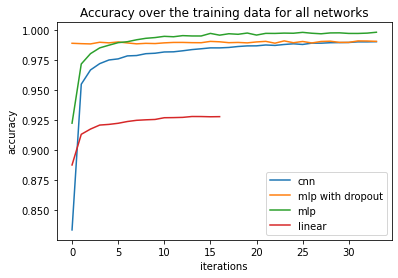

In [14]:
plt.plot(model_cnn_history.history['accuracy'], label = 'cnn')
plt.plot(history_mlp_dropped.history['accuracy'], label ='mlp with dropout')
plt.plot(history_mlp.history['accuracy'], label ='mlp')
plt.plot(history_linear.history['accuracy'], label ='linear')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title('Accuracy over the training data for all networks')
plt.show()

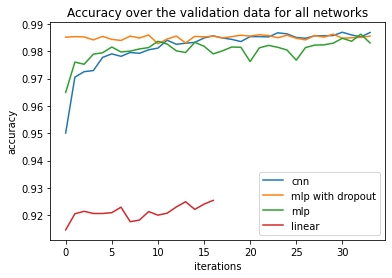

In [15]:
plt.plot(model_cnn_history.history['val_accuracy'], label = 'cnn')
plt.plot(history_mlp_dropped.history['val_accuracy'], label ='mlp with dropout')
plt.plot(history_mlp.history['val_accuracy'], label ='mlp')
plt.plot(history_linear.history['val_accuracy'], label ='linear')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.title('Accuracy over the validation data for all networks')
plt.show()

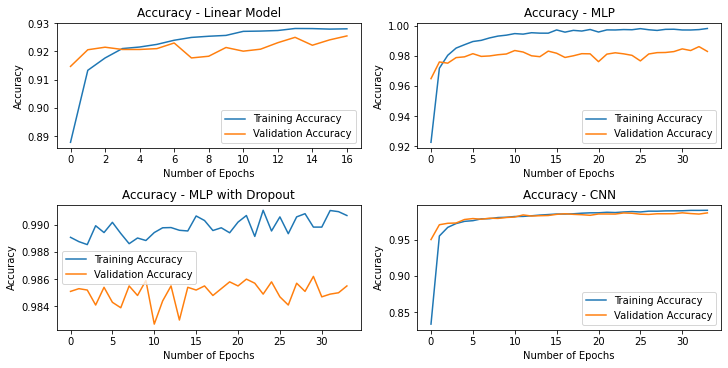

In [13]:
fig, ax = plt.subplots(2,2,constrained_layout=True, figsize=(10,5))

ax[0][0].plot(history_linear.history["accuracy"], label = "Training Accuracy")
ax[0][0].plot(history_linear.history["val_accuracy"], label = "Validation Accuracy")
ax[0][0].set_title("Accuracy - Linear Model")
ax[0][0].set_xlabel("Number of Epochs")
ax[0][0].set_ylabel("Accuracy")
ax[0][0].legend()

ax[0][1].plot(history_mlp.history["accuracy"], label = "Training Accuracy")
ax[0][1].plot(history_mlp.history["val_accuracy"], label = "Validation Accuracy")
ax[0][1].set_title("Accuracy - MLP")
ax[0][1].set_xlabel("Number of Epochs")
ax[0][1].set_ylabel("Accuracy")
ax[0][1].legend()

ax[1][0].plot(history_mlp_dropped.history["accuracy"], label = "Training Accuracy")
ax[1][0].plot(history_mlp_dropped.history["val_accuracy"], label = "Validation Accuracy")
ax[1][0].set_title("Accuracy - MLP with Dropout")
ax[1][0].set_xlabel("Number of Epochs")
ax[1][0].set_ylabel("Accuracy")
ax[1][0].legend()

ax[1][1].plot(model_cnn_history.history["accuracy"], label = "Training Accuracy")
ax[1][1].plot(model_cnn_history.history["val_accuracy"], label = "Validation Accuracy")
ax[1][1].set_title("Accuracy - CNN")
ax[1][1].set_xlabel("Number of Epochs")
ax[1][1].set_ylabel("Accuracy")
ax[1][1].legend()
plt.show()

- The linear model is underfitting a little bit => no big difference in accuracy between training and validation but accuracy not really high compared to the other models (maybe because the model is too small)

- MLP: overfitting: very high performance on training data set but lower accuracy on validation data set (eventhough still high, but nevertheless overfitting). This shows that the model learn patterns that are too  specific to the training data set and not general enough. One possible reason for this is that the model is too  large, i.e. has too many trainable parameters.

- MLP with dropout: good fit: training and validation accuracy are quite similar and high in value 

- CNN: good fit, comparable to MLP with dropout 

The MLP with dropout may have a comparable performance to the CNN but has a lot more trainable parameters and is therefore computationnally more expensive (5 million against 80 000 parameters). Both methods (regularization or convulational layers with downsampling) prevent overfitting.
